In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense


**TASK - 1**

In [5]:
from google.colab import files
uploaded=files.upload()

Saving DS3_C2_S4_Regression_Practice_WhiteWine_Data.csv to DS3_C2_S4_Regression_Practice_WhiteWine_Data.csv


In [6]:
import io

df=pd.read_csv(io.BytesIO(uploaded['DS3_C2_S4_Regression_Practice_WhiteWine_Data.csv']))

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Data preparation**

**Data Manipulation**

In [10]:
x=df.drop(['alcohol'],axis=1)

In [12]:
y=df[['alcohol']]

In [13]:
y.head()                          

,alcohol
0,8.8
1,9.5
2,10.1
3,9.9
4,9.9


In [14]:
def splitdata(x,y,ratio=0.2):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = ratio )
  return(x_train,y_train,x_test,y_test)

In [23]:
splitdata(x,y)

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 3017            5.9              0.34         0.30            3.80      0.035   
 2579            6.4              0.28         0.56            1.70      0.156   
 4283            6.0              0.20         0.26            6.80      0.049   
 1946            6.4              0.22         0.32           12.00      0.066   
 782             6.9              0.22         0.37           15.00      0.053   
 ...             ...               ...          ...             ...        ...   
 3759            7.8              0.19         0.32            7.40      0.015   
 3675            5.6              0.25         0.19            2.40      0.049   
 3225            6.6              0.33         0.40            2.65      0.041   
 1674            6.8              0.22         0.29            8.90      0.046   
 1141            9.3              0.34         0.49            7.30      0.052   
 
       free su

In [65]:
def plotdata(df,nc,ctype):
  if ctype not in ['h','c','b']:
    msg='Invalid Chart Type specified'
    return(msg)
# correlation plot
  if ctype=='c':
     cor = df[nc].corr()
     cor = np.tril(cor)
     plt.figure(figsize=(16,9))
     sns.heatmap(cor,vmin=-1,vmax=1,xticklabels=nc,
     yticklabels=nc,square=False,annot=True,linewidths=1)
  else:
    COLS = 2
    ROWS = int(np.ceil(len(nc)/COLS) * 2)
    POS = 1
 # fig = plt.figure() # outer plot
    fig,ax = plt.subplots(ROWS,COLS,figsize=(20,12))
    for c in nc:
      fig.add_subplot(ROWS,COLS,POS)
      if ctype=='b':
        sns.boxplot(df[c],color='yellow')
      else:
        sns.histplot(df[c],bins=20,color='green')
      if POS%2 == 0: 
        POS+=3
      else:
        POS+=1
  return(1)

**Data Normalization**

In [36]:
cols = list(x.columns)


In [37]:
print(cols)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']


In [55]:
df_scaled = x.copy()

In [56]:
minmax = MinMaxScaler()

In [57]:
df_scaled.iloc[:,:] = minmax.fit_transform(x.iloc[:,:])


In [58]:
x.head(3)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,6


In [59]:
df_scaled.head(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.5


**Data Visualization**

1

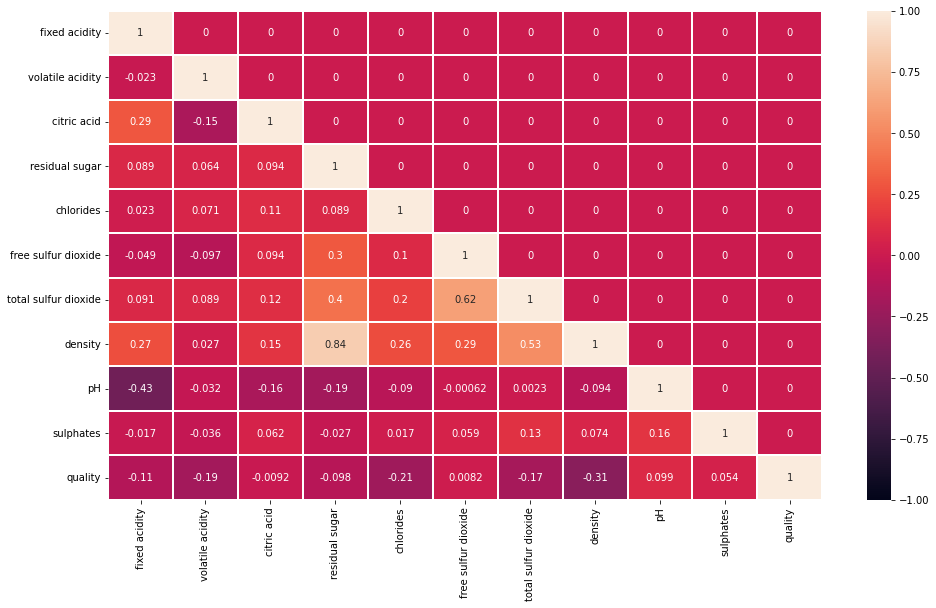

In [60]:
#Correlation matrix (heatmap)

plotdata(df,cols,'c')


1

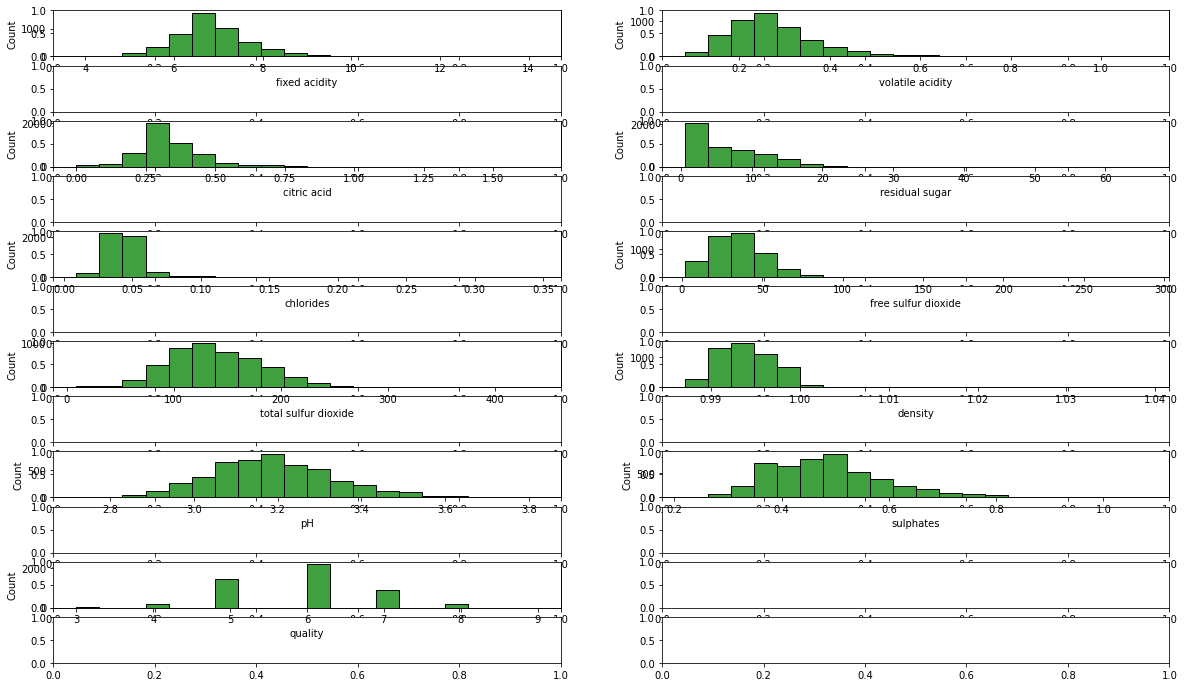

In [62]:
#Histogram (check and identify the distribution)

plotdata(df,cols,'h')


1

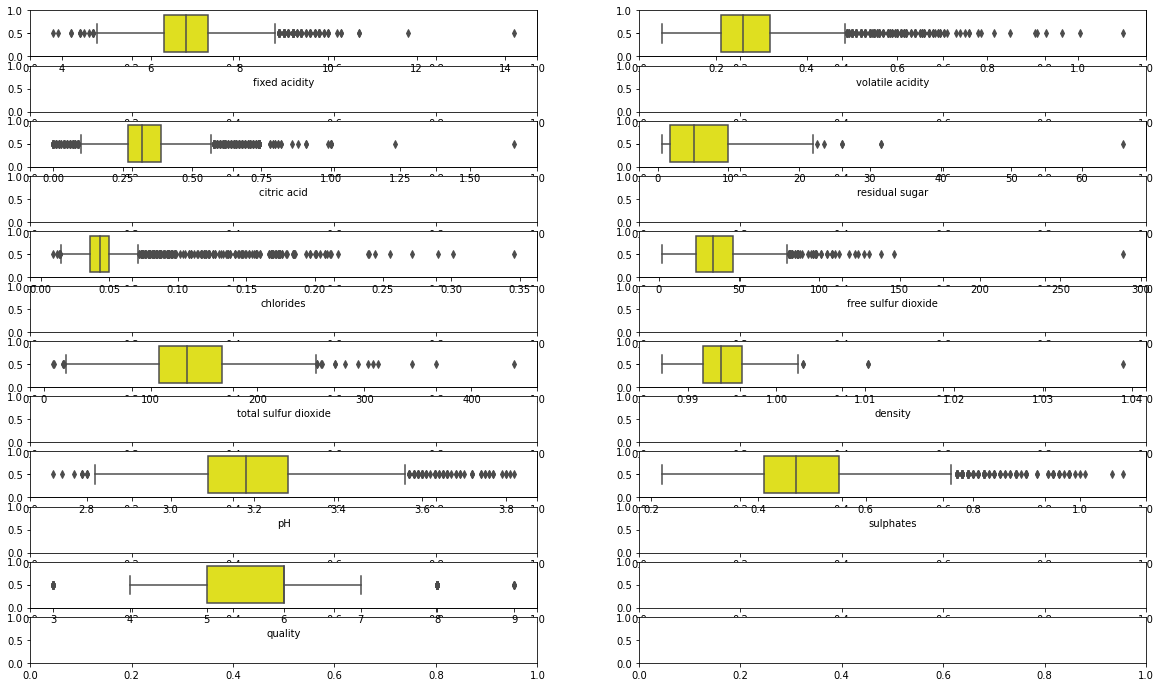

In [64]:
#Boxplot (check and identify outliers)

plotdata(df,cols,'b')


 **Data Splitting**

---



In [66]:
#split the dataset into train and test

x_train,y_train,x_test,y_test = splitdata(x,y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3918, 11) (3918,) (980, 11) (980,)


**TASK - 2**

**A) Building the model**

In [67]:
#Compile the regression model with initial set of input values

def compileModel(units, shape, loss,lr=0.001):
  model = keras.Sequential([Dense(units,activation='relu',input_shape=[shape]),Dense(units-5, activation='relu'),Dense(units-5, activation='relu'),
  Dense(1,activation='relu') ])
#set the learning rate
  optimizer = tf.keras.optimizers.RMSprop(lr)
#compile the model
  model.compile(loss=loss,optimizer=optimizer,metrics=['mae','mse'])
  model.compile(loss=loss,optimizer=optimizer,metrics=[RMSE])
  model.compile(loss=loss,optimizer='adam',metrics=[RMSE])
  return(model)


In [68]:
#Prints a dot after 100 epochs. Shows the progress of the model fit

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,lags):
    if epoch%10 == 0:
      print(".", end = " ")

**B) Fitting the model**

In [69]:
#Fit the compiled model on the training dataset

def fitModel(model,loss,x_train,y_train,ep,val_split=0.2):
  errors = model.fit(x_train,y_train,epochs=ep, validation_split = val_split,verbose=0, callbacks =[PrintDot()])
# error history
  errhistory = pd.DataFrame(errors.history)
  errhistory['epoch'] = errors.epoch
  errhistory = errhistory.rename(columns={'loss':'train_loss', 'root_mean_squared_error':'train_rmse', 'val_root_mean_squared_error':'val_rmse'})
  return(errhistory)


In [70]:
#To display the validation error and loss values for a given model

def printErrors(loss,val_rmse,val_loss):
  print("Loss Function = {}, Validation RMSE and Loss in last epoch = {} and {}".format(loss,val_rmse,val_loss))

In [ ]:
#Plot the Testing and Validation Errors on the same plot



In [71]:
def plotErrors(hist):
  plt.figure(figsize=(8,4))
  plt.subplot(121)
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.plot(hist.epoch, hist.train_rmse, label='Training RMSE')
  plt.plot(hist.epoch, hist.val_rmse, label='Validation RMSE')
  plt.ylim([0,5])
  plt.title('RMSE comparison')
  plt.legend()
  plt.subplot(122)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist.epoch, hist.train_loss, label='Training Loss')
  plt.plot(hist.epoch, hist.val_loss, label='Validation Loss')
  plt.ylim([0,5])
  plt.title('Loss comparison')
  plt.legend()
  plt.show()

**C) Prediction using the model**

In [72]:
 #Predictions on the test dataset

def predictModel(model,x_test,y_test):
  predictions=model.predict(x_test).flatten()
  predictions = predictions.astype(int)
# create dataframe to store actual and predicted results
  df1=pd.DataFrame({"actual":y_test, "predicted":predictions,'err': np.round(y_test-predictions,3),'errsq': np.round(pow(y_test-predictions,2),3) })
  return(df1)


**TASK - 3**

**A**

In [73]:
#Defining Loss Function
#build the model with some initial values

units = 10
shape = len(x_train.columns)


In [97]:
#different loss functions

MSE = tf.keras.losses.MeanSquaredError()
MAE = tf.keras.losses.MeanAbsoluteError()
RMSE = tf.keras.metrics.RootMeanSquaredError()

**B**

In [99]:
#Build Model
#build and fit the model with loss function = RMSE

epoch = 1000
m1 = compileModel(units, shape, MAE)
e1 = fitModel(m1,"MSE",x_train,y_train,epoch,val_split=0.2)
printErrors("MSE",list(e1['val_rmse'])[-1], list(e1['val_loss'])[-1])


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Loss Function = MSE, Validation RMSE and Loss in last epoch = 0.9326455593109131 and 0.7048843502998352


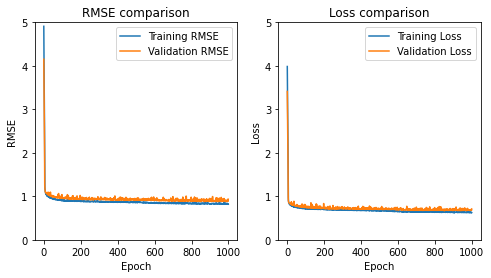

In [100]:
#plot the errors of the first model
plotErrors(e1)

In [101]:
#Predict Using Model
#predict using the first model and plot the best fit line

p1 = predictModel(m1,x_test,y_test)
p1

,actual,predicted,err,errsq
2727,10.500000,10,0.500,0.250
2180,9.500000,9,0.500,0.250
4263,12.200000,10,2.200,4.840
4554,12.700000,11,1.700,2.890
1849,11.400000,9,2.400,5.760
...,...,...,...,...
988,10.800000,10,0.800,0.640
4363,9.500000,9,0.500,0.250
4148,9.600000,9,0.600,0.360
4377,11.333333,10,1.333,1.778


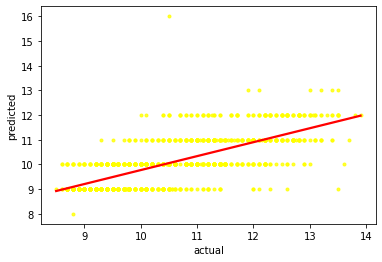

In [95]:
#plot the actual and predicted values

sns.regplot(x=p1.actual,y=p1.predicted,marker='.',color='yellow',line_kws={'color':'red'},ci=None)


**C**

In [87]:
 #Improvization of Model

epoch = 1000
m2 = compileModel(units, shape, MAE)
e2 = fitModel(m2,"MAE",x_train,y_train,epoch,val_split=0.2)
printErrors("MAE",list(e2['val_rmse'])[-1], list(e2['val_loss'])[-1])

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Loss Function = MAE, Validation RMSE and Loss in last epoch = 0.9139677882194519 and 0.7010205984115601


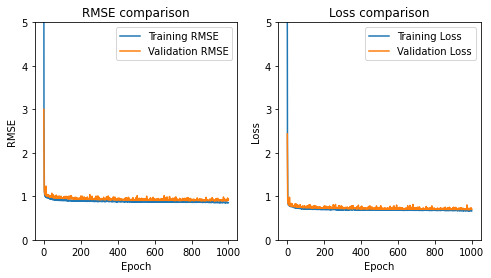

In [88]:
#plot the errors of the second model
plotErrors(e2)

In [90]:
#predict using the second model and plot the best fit line
p2 = predictModel(m2,x_test,y_test)
p2

,actual,predicted,err,errsq
2727,10.500000,10,0.500,0.250
2180,9.500000,10,-0.500,0.250
4263,12.200000,10,2.200,4.840
4554,12.700000,11,1.700,2.890
1849,11.400000,10,1.400,1.960
...,...,...,...,...
988,10.800000,10,0.800,0.640
4363,9.500000,9,0.500,0.250
4148,9.600000,9,0.600,0.360
4377,11.333333,11,0.333,0.111


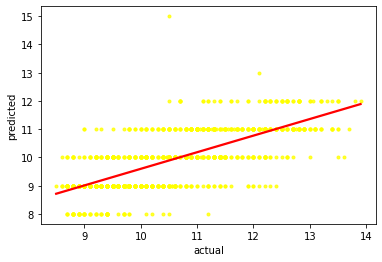

In [91]:
#plot the actual and predicted values

sns.regplot(x=p2.actual,y=p2.predicted,marker='.',color='yellow',line_kws={'color':'red'},ci=None)